Basic intution of random forest using Decision trees



In [100]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [56]:
x,y=make_classification(n_samples=100,n_features=4,n_informative=4,n_redundant=0)

In [57]:
df=pd.DataFrame(x,columns=['f1','f2','f3','f4'])
df['target']=y

In [58]:
df.head()

,f1,f2,f3,f4,target
0,-3.705883,0.365188,-2.479228,-3.148060,0
1,0.145007,1.813533,-0.239424,-0.283286,1
2,-2.073983,0.219422,-0.965026,-2.103146,0
3,-1.572905,0.273085,-1.873874,-1.180017,0
4,1.767754,-4.492504,0.882232,-0.295193,0


In [59]:
df.shape

(100, 5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      100 non-null    float64
 1   f2      100 non-null    float64
 2   f3      100 non-null    float64
 3   f4      100 non-null    float64
 4   target  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [61]:
def row_sample(df,percent):
  return df.sample(int(percent*df.shape[0]))

In [83]:
def feature_sample(df,percent):
    col=random.sample(list(df.columns)[:-1],int(percent*df.shape[1]-1))
    return df[col]

In [84]:
def combined_sample(df,row_percent,col_percent):
  new_df=row_sample(df,row_percent)
  return feature_sample(new_df,col_percent)



In [85]:
df1=row_sample(df,0.2)
df1

,f1,f2,f3,f4,target
27,-1.582724,-0.552765,-1.321896,-0.388228,0
79,-2.056591,1.544812,-2.375260,-0.852268,0
19,-0.166498,1.627075,1.256280,1.940680,1
37,-1.141015,1.352758,1.413562,0.314892,1
2,-2.073983,0.219422,-0.965026,-2.103146,0
71,-0.192383,-2.576191,-0.074762,-0.977047,0
29,-1.794834,-0.488468,-2.018306,1.259801,0
15,-2.622735,0.027192,-1.865365,-1.905548,0
60,0.390447,-0.679403,-1.181179,1.080386,0
8,0.837831,0.490671,1.578945,-1.210415,1


In [86]:
df2=row_sample(df,0.2)
df2

,f1,f2,f3,f4,target
26,1.626828,-0.672309,0.680864,0.422718,1
54,-1.764571,-1.376408,-1.104528,-2.120650,0
82,-1.537991,-0.322971,-1.202977,0.807452,0
91,-1.263922,-0.061519,-0.541104,0.751273,0
55,2.415342,-0.767927,2.709417,-1.679973,1
49,-1.510142,0.356974,-1.056779,1.216452,0
22,-1.347663,-0.554844,-0.335319,0.782636,0
66,-0.734325,0.878687,0.296284,0.766152,1
51,0.192559,2.953224,1.458630,-2.589873,1
97,-0.552900,0.934764,-1.428056,0.642309,0


In [87]:
df3=row_sample(df,0.2)

In [88]:
df3.shape

(20, 5)

In [89]:
df3

,f1,f2,f3,f4,target
35,3.619722,-1.042359,1.144738,0.001305,1
75,0.058922,-1.496310,-0.631022,-0.444035,0
41,-1.050678,-0.644393,-1.916719,0.768213,0
86,-0.301929,2.785781,0.614555,1.066949,1
2,-2.073983,0.219422,-0.965026,-2.103146,0
39,-2.087640,-0.085864,-1.647706,-1.671842,0
59,0.465028,3.667964,0.386344,1.839132,1
15,-2.622735,0.027192,-1.865365,-1.905548,0
25,3.086995,1.719873,2.481344,-2.957587,1
99,-1.928826,0.829582,0.292157,-0.556175,1


In [90]:
df3.iloc[:,0:4]

,f1,f2,f3,f4
35,3.619722,-1.042359,1.144738,0.001305
75,0.058922,-1.496310,-0.631022,-0.444035
41,-1.050678,-0.644393,-1.916719,0.768213
86,-0.301929,2.785781,0.614555,1.066949
2,-2.073983,0.219422,-0.965026,-2.103146
39,-2.087640,-0.085864,-1.647706,-1.671842
59,0.465028,3.667964,0.386344,1.839132
15,-2.622735,0.027192,-1.865365,-1.905548
25,3.086995,1.719873,2.481344,-2.957587
99,-1.928826,0.829582,0.292157,-0.556175


In [91]:
df3.iloc[:,-1]

,target
35,1
75,0
41,0
86,1
2,0
39,0
59,1
15,0
25,1
99,1


In [92]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [93]:
model=DecisionTreeClassifier(max_depth=2)


In [94]:
clf1=model.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2=model.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3=model.fit(df3.iloc[:,0:4],df3.iloc[:,-1])


[Text(0.5, 0.75, 'x[2] <= -0.14\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.625, 0.5, '  False')]

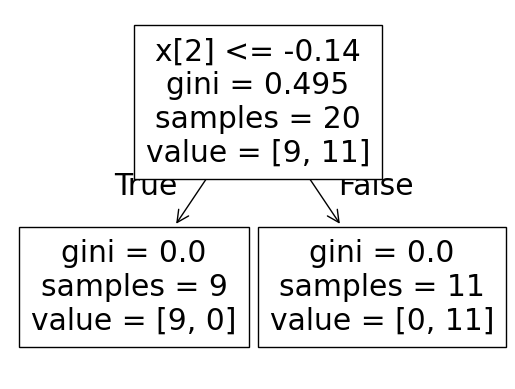

In [95]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[2] <= -0.14\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.625, 0.5, '  False')]

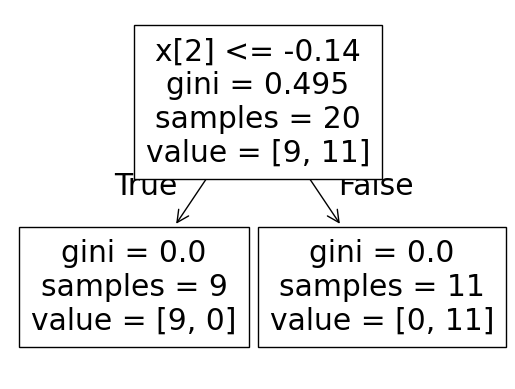

In [96]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[2] <= -0.14\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.625, 0.5, '  False')]

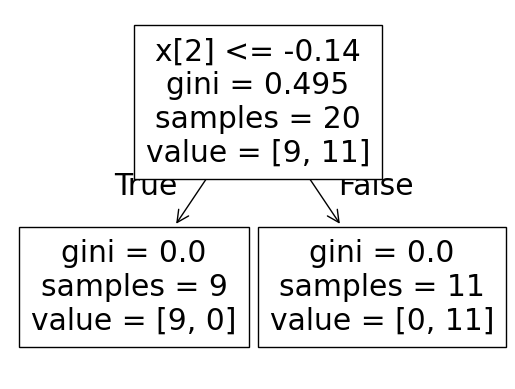

In [97]:
plot_tree(clf3)

In [98]:

clf1.predict(np.array([-0.478878	,3.633954	,0.249686	,-2.000432]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [81]:
clf2.predict(np.array([-0.478878	,3.633954	,0.249686	,-2.000432]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [82]:
clf3.predict(np.array([-0.478878	,3.633954	,0.249686	,-2.000432]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [105]:
df4=feature_sample(df,0.60)

,f1,f3
0,-3.705883,-2.479228
1,0.145007,-0.239424
2,-2.073983,-0.965026
3,-1.572905,-1.873874
4,1.767754,0.882232
...,...,...
95,-2.397136,-0.811560
96,-0.004081,-0.893753
97,-0.552900,-1.428056
98,-0.171815,-1.432812


In [106]:
df5=feature_sample(df,0.60)

In [107]:
df6=feature_sample(df,0.60)

In [108]:
df5.shape

(100, 2)